# Practice Assignment: Understanding Distributions Through Sampling

** *This assignment is optional, and I encourage you to share your solutions with me and your peers in the discussion forums!* **


To complete this assignment, create a code cell that:
* Creates a number of subplots using the `pyplot subplots` or `matplotlib gridspec` functionality.
* Creates an animation, pulling between 100 and 1000 samples from each of the random variables (`x1`, `x2`, `x3`, `x4`) for each plot and plotting this as we did in the lecture on animation.
* **Bonus:** Go above and beyond and "wow" your classmates (and me!) by looking into matplotlib widgets and adding a widget which allows for parameterization of the distributions behind the sampling animations.


Tips:
* Before you start, think about the different ways you can create this visualization to be as interesting and effective as possible.
* Take a look at the histograms below to get an idea of what the random variables look like, as well as their positioning with respect to one another. This is just a guide, so be creative in how you lay things out!
* Try to keep the length of your animation reasonable (roughly between 10 and 30 seconds).

<IPython.core.display.Javascript object>


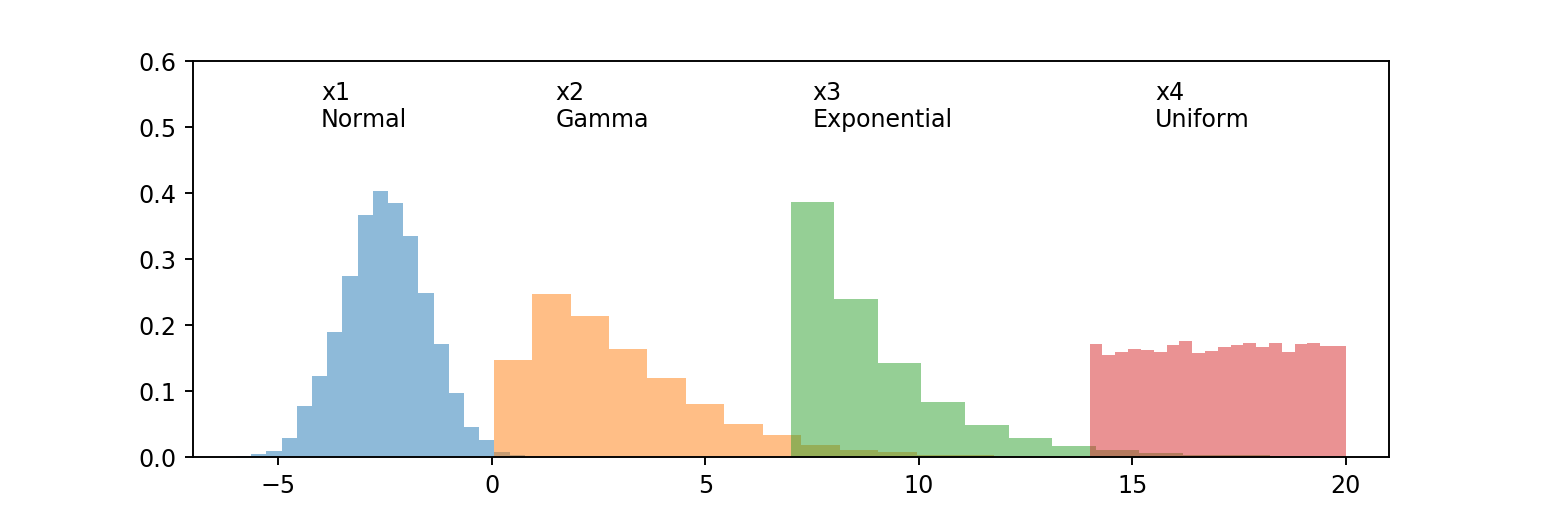

In [55]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib notebook

# generate 4 random variables from the random, gamma, exponential, and uniform distributions
x1 = np.random.normal(-2.5, 1, 10000)
x2 = np.random.gamma(2, 1.5, 10000)
x3 = np.random.exponential(2, 10000)+7
x4 = np.random.uniform(14,20, 10000)

# plot the histograms
plt.figure(figsize=(9,3))
plt.hist(x1, normed=True, bins=20, alpha=0.5)
plt.hist(x2, normed=True, bins=20, alpha=0.5)
plt.hist(x3, normed=True, bins=20, alpha=0.5)
plt.hist(x4, normed=True, bins=20, alpha=0.5);
plt.axis([-7,21,0,0.6])

plt.text(x1.mean()-1.5, 0.5, 'x1\nNormal')
plt.text(x2.mean()-1.5, 0.5, 'x2\nGamma')
plt.text(x3.mean()-1.5, 0.5, 'x3\nExponential')
plt.text(x4.mean()-1.5, 0.5, 'x4\nUniform')

<IPython.core.display.Javascript object>


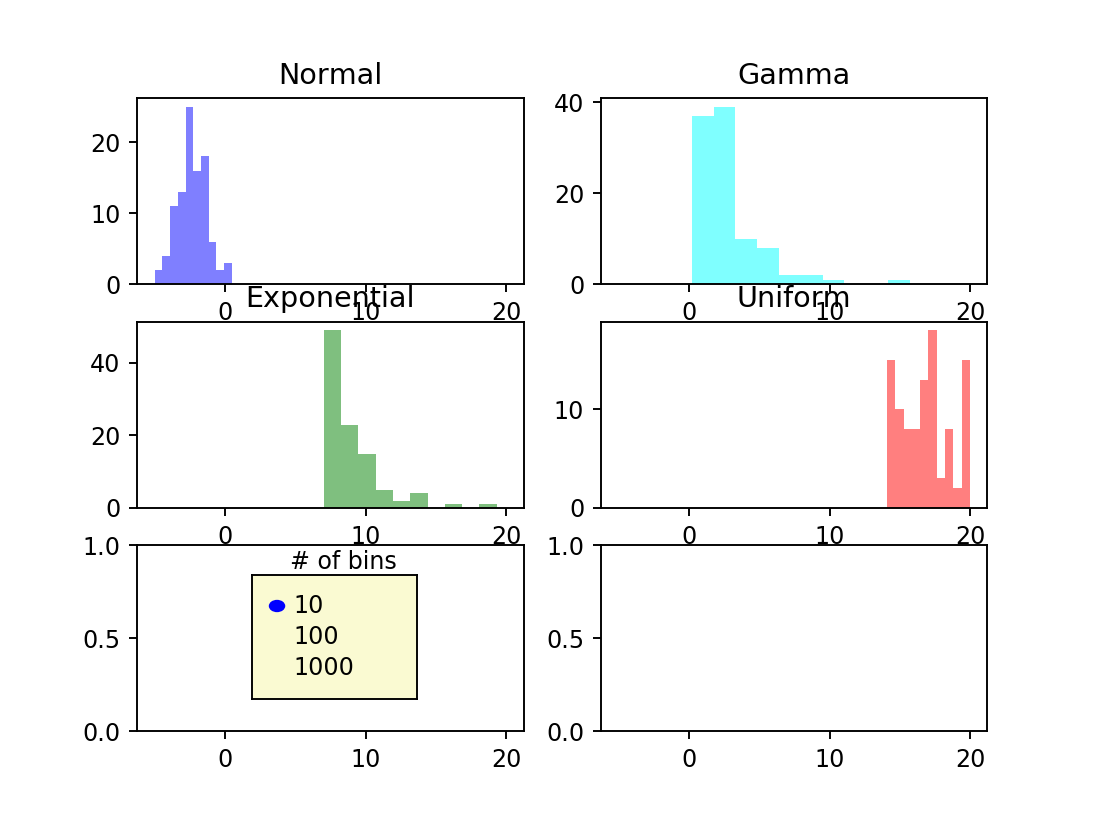

0

In [57]:
from matplotlib.widgets import RadioButtons
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation



fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex=True)
axs = [ax1,ax2,ax3,ax4]

normal = np.random.normal(-2.5, 1, 10000)
gamma = np.random.gamma(2, 1.5, 10000)
exp = np.random.exponential(2, 10000)+7
uniform = np.random.uniform(14,20, 10000)
b = 10

axs[0].hist(eval('normal'), bins=b, alpha=0.5, color = 'blue')
axs[0].set_title('Normal')
plt.xlim(-10, 25)

axs[1].hist(eval('gamma'), bins=b, alpha=0.5, color = 'cyan')
axs[1].set_title('Gamma')
plt.xlim(-10, 25)

axs[2].hist(eval('exp'), bins=b, alpha=0.5, color = 'green')
axs[2].set_title('Exponential')
plt.xlim(-10, 25)

axs[3].hist(eval('uniform'), bins=b, alpha=0.5, color = 'red')
axs[3].set_title('Uniform')
plt.xlim(-10, 25)

#add button
button_color = 'lightgoldenrodyellow'
rax = plt.axes([0.23, 0.15, 0.15, 0.15], facecolor=button_color)
bins_button = RadioButtons(rax, (10, 100, 1000))
plt.text(0.23, 1.05, '# of bins', fontsize=10)

#let us start animating!
n = 100
x = np.random.randn(n)

def update(curr):
    if curr == n: 
        a.event_source.stop()
    
    bins = bins_button.value_selected
  
    ax1.cla()
    ax1.hist(normal[:curr], bins=int(bins), alpha=0.5, color='blue')
    ax1.set_title('{}'.format('Normal')) 
    
    ax2.cla()
    ax2.hist(gamma[:curr], bins=int(bins), alpha=0.5, color='cyan')
    ax2.set_title('{}'.format('Gamma')) 
    
    ax3.cla()
    ax3.hist(exp[:curr], bins=int(bins), alpha=0.5, color='green')
    ax3.set_title('{}'.format('Exponential')) 
    
    ax4.cla()
    ax4.hist(uniform[:curr], bins=int(bins), alpha=0.5, color='red')
    ax4.set_title('{}'.format('Uniform')) 
    
    
a = animation.FuncAnimation(fig, update, interval=100)
bins_button.on_clicked(update)
